# Monte Carlo 

Use Monte Carlo simulation to approximate E[g(X)], compare with the exact solution to see how close it is 

# (1) Compute "area" of a triangle (0,0), (0.5,1), (1,0) == 0.5

In [51]:
import random
import numpy as np
size = 1000
rx=np.zeros(size)
ry=np.zeros(size)
count = 0
for i in range(size):
    x=random.random()
    y=random.random()
    rx[i]=x
    ry[i]=y
    if x<=0.5 and  y<=(2*x):
        count += 1
    elif x>0.5 and y<=(2-2*x):
        count += 1
    else:
        count +=0
print(count/size)

0.503


(-0.1, 1.1)

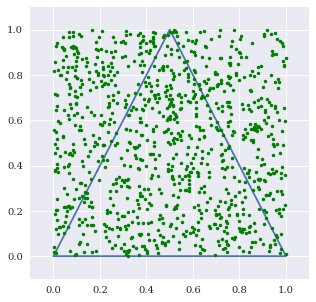

In [53]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
x=np.array([0,1,0.5,0])
y=np.array([0,0,1,0])
triangle = plt.plot(x,y)   # Draws the triangle
box = plt.Rectangle((0, 0), 1, 1, edgecolor='b', alpha=0.2)  # Draws the square with side length of 1.
plt.plot(rx, ry, 'g.')  # Draws the uniformly distributed random dots.
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)

In [13]:
plt.triplot?

# (2A) Pure Python: Simulation value of "pi = = 3.14159"

In [54]:
def mcs_pi_py(n):
    circle = 0
    for _ in range(n):
        x, y = random.random(), random.random()
        if (x ** 2 + y ** 2) ** 0.5 <= 1:
            circle += 1
    return (4 * circle) / n

In [58]:
n = 100000
%time mcs_pi_py(n)

Wall time: 400 ms


3.14224

# (2B) Numpy: Simulation value of "pi = = 3.14159"

In [62]:
import numpy as np
import numpy.random as npr 

size = 1000
count = 0
for i in range(size):
    x = np.random.rand()
    y = np.random.rand()
    z = x**2+y**2
    c = np.where(z<=1, 1, 0)
    count += c
print(4*count/size)

3.132


In [63]:
run = 1000
sample_size = 100
count = np.zeros(run)
c = np.zeros(run)
x = npr.rand(sample_size, run)
y = npr.rand(sample_size, run)
z = npr.rand(sample_size, run)
for i in range(sample_size):
    z=x**2+y**2
    c = np.where(z<=1, 1, 0)
    count = count + c

pi = count/sample_size*4
print(np.mean(pi[-1]))

3.152


# (2C) Numpy: Simulation value of "pi = = 3.14159"

The code examples is taken from Stack Exchange 
(https://codereview.stackexchange.com/questions/69370/monte-carlo-pi-calculation)

In [64]:
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [65]:
rn = [(random.random() * 2 - 1, random.random() * 2 - 1)
      for _ in range(500)]

In [66]:
rn = np.array(rn)
rn[:5]

array([[-0.34295527,  0.3818266 ],
       [ 0.68690226,  0.54596719],
       [ 0.30850007, -0.43403797],
       [ 0.41432158, -0.43919699],
       [-0.17900105, -0.41269354]])

(-1.1, 1.1)

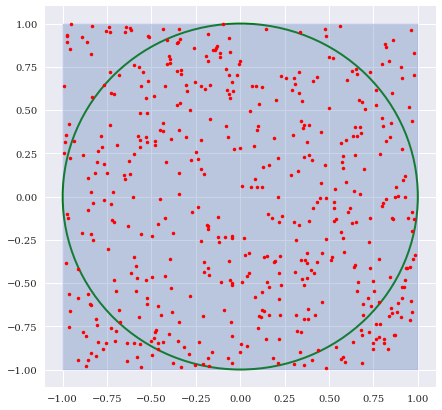

In [67]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)
circ = plt.Circle((0, 0), radius=1, edgecolor='g', lw=2.0,
                  facecolor='None')   # Draws the unit circle.
box = plt.Rectangle((-1, -1), 2, 2, edgecolor='b', alpha=0.3)  # Draws the square with side length of 2.
ax.add_patch(circ)   # Draws the unit circle.
ax.add_patch(box)    # Draws the square with side length of 2.
plt.plot(rn[:, 0], rn[:, 1], 'r.')  # Draws the uniformly distributed random dots.
plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)

In [ ]:
plt.Rectangle?

In [68]:
# 剛剛撒 500 個點, 現在撒多一點 
n = int(1e7)

In [69]:
%time rn = np.random.random((n, 2)) * 2 - 1

Wall time: 1 s


In [70]:
rn.nbytes

160000000

In [71]:
# The distance of the points from the origin (Euclidean norm).
%time distance = np.sqrt((rn ** 2).sum(axis=1))   # axis=1 指 x 軸 
distance[:8].round(3)

Wall time: 859 ms


array([0.916, 0.906, 0.446, 0.221, 0.46 , 0.764, 1.057, 0.792])

In [72]:
# The fraction of those points on the circle relative to all points.
%time frac = (distance <= 1.0).sum() / len(distance)

Wall time: 76 ms


In [73]:
# This accounts for the square area of 4 for the estimation of the circle area and therewith of π.
pi_mcs = frac * 4
pi_mcs

3.1420616

# (3) Monte Carlo: int_(-10)^x cos(t)dt = sin(x)-sin(-10)

sin(-10)+int_(-10}^x cos(t)dt = sin(x)  (left: emsemble; right:exact)
Compare the sample mean and ensemble mean for 

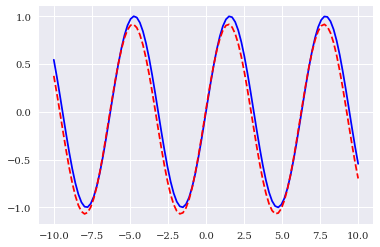

In [74]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

N=100
a=-10
b=10
t = np.linspace(a, b, N)
true_y = np.sin(t)
sample_y = np.sin(a) + (b-a)*np.cumsum(np.cos(t))/N

plt.plot(t,true_y, 'b-')
plt.plot(t,sample_y,'r--')

# (4) Monte Carlo: int_-5^x cos(2*pi*t)dt = sin(2*pi*x) - sin(2*pi*a)  (left: emsemble; right:exact)

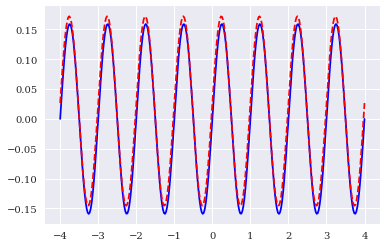

In [75]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt


N=300
a=-4
b=4
t = np.linspace(a, b, N)
true_y = np.sin(2*pi*t)/(2*pi)

sample_y = (b-a)*np.cumsum(np.cos(2*pi*t))/N

plt.plot(t,true_y, 'b-')
plt.plot(t,sample_y,'r--')

# (5) E[cos(2*pi*F*t)] = (1/fo)int_0^(fo) cos(2*pi*f*t)df = sin(2*pi*fo*t)/(2*pi*fo*t)

Text(0.5,1,'the sample mean')

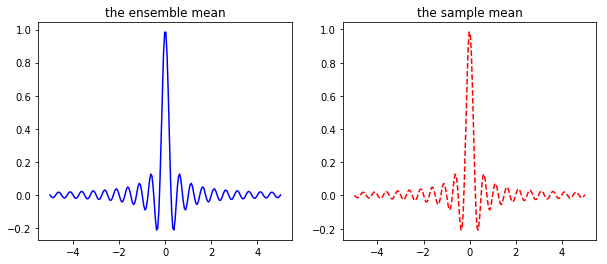

In [268]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

N=200
fo=2
a=-5
b=5
true_y=np.zeros(N)
sum_y=np.zeros(N)
sample_y=np.zeros(N)
sample=np.zeros(N)
t = np.linspace(a, b, N)
x = np.linspace(0,1,N)
F=fo*x
for i in range(1, N):
    true_y[i] = np.sin(2*pi*fo*t[i])/(2*pi*fo*t[i])
    for j in range(N):
        sample[i] = sample[i] + (np.cos(2*pi*F[j]*t[i]))
    sample_y[i] = sample[i]/N

    
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(t,true_y, 'b-')
plt.title('the ensemble mean')
plt.subplot(122)
plt.plot(t,sample_y,'r--')
plt.title('the sample mean')